In [ ]:
import theano
theano.config.device = 'gpu'
theano.config.floatX = 'float32'

In [3]:
from keras.preprocessing import image
import numpy as np
from os import path
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import colors
import keras

In [4]:
keras.__version__

'2.0.4'

In [5]:
base_dir = '/var/scratch/bweel/datasets/cervical/processed/cropped/'
test_dir = '/home/cmeijer/cervical-cancer/temp'
gen_test_gen = image.ImageDataGenerator(rotation_range=360, zoom_range=[0.90,1], horizontal_flip=True)
gen_test = gen_test_gen.flow_from_directory(test_dir, target_size=(64,64), shuffle=False, batch_size=1)

Found 2 images belonging to 1 classes.


(64, 64, 3)


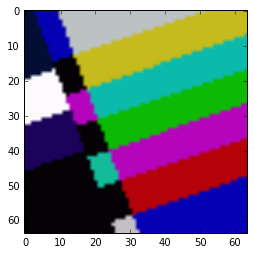

In [13]:
im = gen_test.next()[0][0]
print(im.shape)
plt.imshow(-im)

In [41]:
gen_train_gen = image.ImageDataGenerator(rotation_range=360, zoom_range=[0.90,1], horizontal_flip=True)
train = gen_train_gen.flow_from_directory(base_dir, target_size=(64,64), shuffle=True)

Found 1481 images belonging to 3 classes.


In [42]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPool2D, Activation, Flatten
from keras.optimizers import Adam
from keras.regularizers import l2
outputdim = 2  # number of classes
weightinit = 'lecun_uniform'  # weight initialization
regularization_rate=0.01
model = Sequential()
model.add(
    BatchNormalization(
        input_shape=(            
            64,64, 3)))
model.add(Conv2D(16, 3, padding='same',
                            kernel_regularizer=l2(regularization_rate),
                            kernel_initializer=weightinit))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Conv2D(16, 3, padding='same',
                            kernel_regularizer=l2(regularization_rate),
                            kernel_initializer=weightinit))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPool2D())
# model.add(Conv2D(16, 3, padding='same',
#                             kernel_regularizer=l2(regularization_rate),
#                             kernel_initializer=weightinit))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Conv2D(16, 3, padding='same',
                            kernel_regularizer=l2(regularization_rate),
                            kernel_initializer=weightinit))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Conv2D(16, 3, padding='same',
                            kernel_regularizer=l2(regularization_rate),
                            kernel_initializer=weightinit))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Conv2D(16, 3, padding='same',
                            kernel_regularizer=l2(regularization_rate),
                            kernel_initializer=weightinit))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding='same',
                            kernel_regularizer=l2(regularization_rate),
                            kernel_initializer=weightinit))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPool2D())
model.add(Conv2D(3, (2,2), padding='valid',
                            kernel_regularizer=l2(regularization_rate),
                            kernel_initializer=weightinit))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation("softmax")) # Final classification layer
learning_rate=0.001

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])


In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 64, 64, 3)         12        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 64, 16)        64        
_________________________________________________________________
activation_8 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 16)        64        
__________

In [44]:
from collections import Counter
classCounts = Counter(train.classes)
max_val = float(np.mean(classCounts.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in classCounts.items()}

In [52]:
(1.0*max(classCounts.values()))/sum(classCounts.values())

0.5273463875759622

In [45]:
class_weights

{0: 1.9746666666666668, 1: 0.6320956039265899, 2: 1.097037037037037}

In [46]:
#history = model.fit_generator(generator=train, validation_steps=100, steps_per_epoch=1481, epochs=10)
history = model.fit_generator(generator=train, validation_steps=100, steps_per_epoch=100, epochs=10, class_weight=class_weights)


Epoch 1/10
100/100 [==============================] - 51s - loss: 2.1572 - acc: 0.4072    
Epoch 2/10
100/100 [==============================] - 50s - loss: 1.9229 - acc: 0.4528    
Epoch 3/10
100/100 [==============================] - 48s - loss: 1.7493 - acc: 0.4664    
Epoch 4/10
100/100 [==============================] - 53s - loss: 1.6098 - acc: 0.4775    
Epoch 5/10
100/100 [==============================] - 48s - loss: 1.4899 - acc: 0.5026    
Epoch 6/10
100/100 [==============================] - 48s - loss: 1.3904 - acc: 0.5036    
Epoch 7/10
100/100 [==============================] - 49s - loss: 1.3063 - acc: 0.5154    
Epoch 8/10
100/100 [==============================] - 50s - loss: 1.2404 - acc: 0.5224    
Epoch 9/10
100/100 [==============================] - 50s - loss: 1.1770 - acc: 0.5126    
Epoch 10/10
100/100 [==============================] - 48s - loss: 1.1356 - acc: 0.5189    


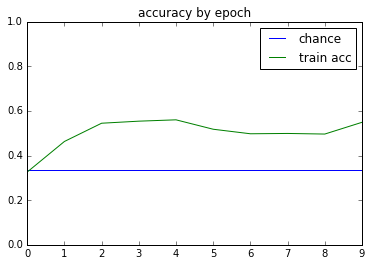

In [20]:
plt.title('accuracy by epoch')
plt.plot(np.zeros(len(history.history['acc'])) + 0.333, label='chance')
plt.plot(history.history['acc'], label='train acc')
plt.ylim(0,1)
plt.legend()